In [13]:
# importing libs
import numpy as np
import tensorflow as tf
import keras
from keras.layers import Input, Dense, GaussianNoise,Lambda
from keras.models import Model
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras import backend as K

In [14]:
# for reproducing reslut
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(3)

In [15]:
# defining parameters
M = 4
k = np.log2(M)
k = int(k)
print ('M:',M,'k:',k)
R = 1
n_channel = 4

M: 4 k: 2


In [16]:
#generating data of size N
N = 10000
label = np.random.randint(M,size=N)

In [17]:
# creating one hot encoded vectors
data = []
for i in label:
    temp = np.zeros(M)
    temp[i] = 1
    data.append(temp)

In [18]:
data = np.array(data)
print (data.shape)

(10000, 4)


In [19]:
temp_check = [17,23,45,67,89,96,72,250,350]
for i in temp_check:
    print(label[i],data[i])

1 [ 0.  1.  0.  0.]
0 [ 1.  0.  0.  0.]
1 [ 0.  1.  0.  0.]
3 [ 0.  0.  0.  1.]
1 [ 0.  1.  0.  0.]
3 [ 0.  0.  0.  1.]
0 [ 1.  0.  0.  0.]
3 [ 0.  0.  0.  1.]
0 [ 1.  0.  0.  0.]


In [20]:
def antirectifier(x):
    y = x/K.l2_normalize(x,axis=0)
    return y
def antirectifier_output_shape(input_shape):
    return input_shape

In [21]:

print (int(k/R))
input_signal = Input(shape=(M,))
encoded = Dense(M, activation='relu')(input_signal)
encoded1 = Dense(n_channel, activation='linear')(encoded)
encoded2 = Lambda(lambda x: (np.sqrt(n_channel)*x)/K.l2_normalize(x,axis=0))(encoded1)
#encoded2 = BatchNormalization()(encoded1)
EbNo_train =  7 # 5.01187 #  coverted 7 db of EbNo
encoded3 = GaussianNoise(np.sqrt(1/(2*R*EbNo_train)))(encoded2)

decoded = Dense(M, activation='relu')(encoded3)
decoded1 = Dense(M, activation='softmax')(decoded)
autoencoder = Model(input_signal, decoded1)
adam = Adam(lr=0.001)
autoencoder.compile(optimizer=adam, loss='categorical_crossentropy')

2


In [22]:
print (autoencoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
lambda_2 (Lambda)            (None, 4)                 0         
_________________________________________________________________
gaussian_noise_2 (GaussianNo (None, 4)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 20        
Total para

In [23]:
N_val = 1500
val_label = np.random.randint(M,size=N_val)
val_data = []
for i in val_label:
    temp = np.zeros(M)
    temp[i] = 1
    val_data.append(temp)
val_data = np.array(val_data)

In [24]:
autoencoder.fit(data, data,
                epochs=300,
                batch_size=250,
                validation_data=(val_data, val_data))

Train on 10000 samples, validate on 1500 samples
Epoch 1/300
10000/10000 [==============================] - 1s - loss: 3.0394 - val_loss: 2.3591
Epoch 2/300
10000/10000 [==============================] - 0s - loss: 2.1149 - val_loss: 1.7971
Epoch 3/300
10000/10000 [==============================] - 0s - loss: 1.6778 - val_loss: 1.5071
Epoch 4/300
10000/10000 [==============================] - 0s - loss: 1.4653 - val_loss: 1.4013
Epoch 5/300
10000/10000 [==============================] - 0s - loss: 1.3992 - val_loss: 1.3880
Epoch 6/300
10000/10000 [==============================] - 0s - loss: 1.3901 - val_loss: 1.3894
Epoch 7/300
10000/10000 [==============================] - 0s - loss: 1.3898 - val_loss: 1.3893
Epoch 8/300
10000/10000 [==============================] - 0s - loss: 1.3884 - val_loss: 1.3894
Epoch 9/300
10000/10000 [==============================] - 0s - loss: 1.3887 - val_loss: 1.3894
Epoch 10/300
10000/10000 [==============================] - 0s - loss: 1.3890 - val_los

10000/10000 [==============================] - 0s - loss: 1.3862 - val_loss: 1.3865
Epoch 86/300
10000/10000 [==============================] - 0s - loss: 1.3863 - val_loss: 1.3864
Epoch 87/300
10000/10000 [==============================] - 0s - loss: 1.3863 - val_loss: 1.3864
Epoch 88/300
10000/10000 [==============================] - 0s - loss: 1.3863 - val_loss: 1.3864
Epoch 89/300
10000/10000 [==============================] - 0s - loss: 1.3862 - val_loss: 1.3864
Epoch 90/300
10000/10000 [==============================] - 0s - loss: 1.3862 - val_loss: 1.3863
Epoch 91/300
10000/10000 [==============================] - 0s - loss: 1.3862 - val_loss: 1.3864
Epoch 92/300
10000/10000 [==============================] - 0s - loss: 1.3863 - val_loss: 1.3864
Epoch 93/300
10000/10000 [==============================] - 0s - loss: 1.3862 - val_loss: 1.3864
Epoch 94/300
10000/10000 [==============================] - 0s - loss: 1.3862 - val_loss: 1.3864
Epoch 95/300
10000/10000 [=================

10000/10000 [==============================] - 0s - loss: 1.3862 - val_loss: 1.3863
Epoch 169/300
10000/10000 [==============================] - 0s - loss: 1.3862 - val_loss: 1.3865
Epoch 170/300
10000/10000 [==============================] - 0s - loss: 1.3862 - val_loss: 1.3863
Epoch 171/300
10000/10000 [==============================] - 0s - loss: 1.3862 - val_loss: 1.3864
Epoch 172/300
10000/10000 [==============================] - 0s - loss: 1.3862 - val_loss: 1.3864
Epoch 173/300
10000/10000 [==============================] - 0s - loss: 1.3862 - val_loss: 1.3864
Epoch 174/300
10000/10000 [==============================] - 0s - loss: 1.3862 - val_loss: 1.3863
Epoch 175/300
10000/10000 [==============================] - 0s - loss: 1.3862 - val_loss: 1.3864
Epoch 176/300
10000/10000 [==============================] - 0s - loss: 1.3862 - val_loss: 1.3863
Epoch 177/300
10000/10000 [==============================] - 0s - loss: 1.3862 - val_loss: 1.3864
Epoch 178/300
10000/10000 [=======

10000/10000 [==============================] - 0s - loss: 1.3862 - val_loss: 1.3864
Epoch 252/300
10000/10000 [==============================] - 0s - loss: 1.3862 - val_loss: 1.3863
Epoch 253/300
10000/10000 [==============================] - 0s - loss: 1.3862 - val_loss: 1.3863
Epoch 254/300
10000/10000 [==============================] - 0s - loss: 1.3862 - val_loss: 1.3863
Epoch 255/300
10000/10000 [==============================] - 0s - loss: 1.3862 - val_loss: 1.3863
Epoch 256/300
10000/10000 [==============================] - 0s - loss: 1.3862 - val_loss: 1.3863
Epoch 257/300
10000/10000 [==============================] - 0s - loss: 1.3862 - val_loss: 1.3864
Epoch 258/300
10000/10000 [==============================] - 0s - loss: 1.3862 - val_loss: 1.3864
Epoch 259/300
10000/10000 [==============================] - 0s - loss: 1.3863 - val_loss: 1.3863
Epoch 260/300
10000/10000 [==============================] - 0s - loss: 1.3862 - val_loss: 1.3864
Epoch 261/300
10000/10000 [=======

In [25]:
from keras.models import load_model
#autoencoder.save('2_2_symbol_autoencoder_v_best.model')

In [26]:
#autoencoder_loaded = load_model('4_7_symbol_autoencoder_v_best.model')

In [27]:
encoder = Model(input_signal, encoded2)

In [28]:
encoded_input = Input(shape=(n_channel,))

deco = autoencoder.layers[-2](encoded_input)
deco = autoencoder.layers[-1](deco)
# create the decoder model
decoder = Model(encoded_input, deco)

In [29]:
N = 5000
test_label = np.random.randint(M,size=N)
test_data = []

for i in test_label:
    temp = np.zeros(M)
    temp[i] = 1
    test_data.append(temp)
    
test_data = np.array(test_data)

In [30]:
temp_test = 6
print (test_data[temp_test][test_label[temp_test]],test_label[temp_test])

1.0 3


In [31]:
autoencoder
print (test_data[0])
print (encoder.predict(test_data))

[ 0.  0.  0.  1.]
[[ 5.06002855  2.93496633  1.85008192  1.70522022]
 [ 5.06002855  2.93496633  1.85008192  1.70522022]
 [ 5.06002855  2.93496633  1.85008192  1.7052201 ]
 ..., 
 [ 0.93277603  1.71216846  0.83922154  0.54186893]
 [ 0.93277603  1.71216857  0.83922148  0.54186887]
 [ 0.93277603  1.71216857  0.83922148  0.54186887]]


In [32]:
def frange(x, y, jump):
  while x < y:
    yield x
    x += jump

In [33]:
EbNodB_range = list(frange(-2,10.5,0.5))
ber = [None]*len(EbNodB_range)
for n in range(0,len(EbNodB_range)):
    EbNo=10.0**(EbNodB_range[n]/10.0)
    noise_std = np.sqrt(1/(2*R*EbNo))
    noise_mean = 0
    no_errors = 0
    nn = N
    noise = noise_std * np.random.randn(nn,n_channel)
    encoded_signal = encoder.predict(test_data) 
    final_signal = encoded_signal + noise
    pred_final_signal =  decoder.predict(final_signal)
    pred_output = np.argmax(pred_final_signal,axis=1)
    no_errors = (pred_output != test_label)
    no_errors =  no_errors.astype(int).sum()
    ber[n] = no_errors / nn 
    print ('SNR:',EbNodB_range[n],'BER:',ber[n])

SNR: -2 BER: 0.7462
SNR: -1.5 BER: 0.7416
SNR: -1.0 BER: 0.748
SNR: -0.5 BER: 0.7438
SNR: 0.0 BER: 0.7434
SNR: 0.5 BER: 0.7474
SNR: 1.0 BER: 0.7452
SNR: 1.5 BER: 0.7458
SNR: 2.0 BER: 0.7498
SNR: 2.5 BER: 0.7486
SNR: 3.0 BER: 0.7502
SNR: 3.5 BER: 0.7486
SNR: 4.0 BER: 0.7482
SNR: 4.5 BER: 0.7502
SNR: 5.0 BER: 0.7494
SNR: 5.5 BER: 0.7478
SNR: 6.0 BER: 0.7458
SNR: 6.5 BER: 0.7482
SNR: 7.0 BER: 0.7502
SNR: 7.5 BER: 0.7482
SNR: 8.0 BER: 0.7552
SNR: 8.5 BER: 0.7488
SNR: 9.0 BER: 0.753
SNR: 9.5 BER: 0.754
SNR: 10.0 BER: 0.7514


In [34]:
import matplotlib.pyplot as plt
from scipy import interpolate
plt.plot(EbNodB_range, ber, 'bo',label='Autoencoder(2,2)')
#tck = interpolate.splrep(EbNodB_range, ber, s=0)
#xnew = np.arange(-2,8.8, 0.6)
#ynew = interpolate.splev(xnew, tck, der=0)
#plt.plot(xnew,ynew,'y')
#plt.plot(list(EbNodB_range), ber_theory, 'ro-',label='BPSK BER')
plt.yscale('log')
plt.xlabel('SNR Range')
plt.ylabel('Block Error Rate')
plt.grid()
plt.legend(loc='upper right',ncol = 1)

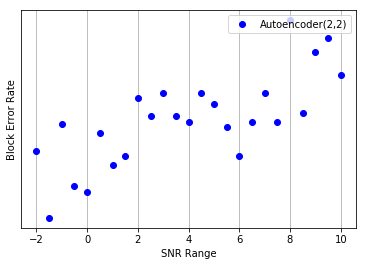

In [35]:
plt.savefig('AutoEncoder_2_2_BER_matplotlib')
plt.show()

In [36]:
print (encoder.predict(np.expand_dims([0,0,0,1],axis=0)))
print (encoder.predict(np.expand_dims([0,0,1,0],axis=0)))
print (encoder.predict(np.expand_dims([0,1,0,0],axis=0)))
print (encoder.predict(np.expand_dims([1,0,0,0],axis=0)))

[[ 0.37955412  0.3126522   0.02497371  0.20963533]]
[[ 1.92966247  0.43632078  0.31874013  0.5554285 ]]
[[ 0.12159108  0.91176349  0.02575182  0.12146593]]
[[ 0.44358423  0.26863465  0.59179062  0.2424037 ]]
